# Лабораторная работа 1

Солодкая М.А. P4240

Полежаева Е.И. P4240

Установка необходимых библиотек и зависимостей.

In [ ]:
# Установка необходимых библиотек
!pip install gym[atari]
!pip install autorom[accept-rom-license]
!pip install stable-baselines3
!pip install PyVirtualDisplay
!sudo apt-get install xvfb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=4f9a7b4ead460d333d8cec0c10c87063470e92d68bff2979b140168ccda05c8a
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.7/181.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 9.7 MB/s eta 0:00:00
  Using cached Farama_Notifications-0.0.4-py3-none-any.whl (2.5 kB)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional package

# Импорт: gym и DQN из stable_baselines3.

In [ ]:
# Импорт необходимых пакетов
import gymnasium as gym
from stable_baselines3 import DQN

# Создание среды Mountain Car

Инициализация среды MountainCar-v0

In [ ]:
# Создание среды
env = gym.make("MountainCar-v0")

In [ ]:
# Описание задачи
observation_space = env.observation_space
action_space = env.action_space

# Инициализация модели DQN с использованием "MlpPolicy" и обучение

Обучение модели на 100 временных шагах и сохранение обученной модели в файл "dqn_cartpole".

In [ ]:
# Инициализация модели
model = DQN("MlpPolicy", env, verbose=1)

# Обучение модели
timestamp=100
model.learn(total_timesteps=timestamp, log_interval=4)
model.save("dqn_cartpole")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


#  Тестирование модели

Установка пакета Xvfb для визуализации среды в Colab.

In [ ]:
!sudo apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.5).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
import gym
from IPython import display
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
from matplotlib import animation

Инициализация, запуск виртуального дисплей. Создание среды для тестирования, и ее сброс.

In [ ]:
# Запуск виртуального дисплея
d = Display()
d.start()

# Создание среды для тестирования
env = gym.make('MountainCar-v0')

# Сброс среды и получение начального наблюдения
obs = env.reset()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
# Запись изображений для создания анимации
img = []
for _ in range(100):
    # Прогноз действия с использованием обученной модели
    action, _states = model.predict(obs, deterministic=True)
    # Применение действия к среде
    obs, reward, terminated, truncated = env.step(action)

    # Очистка вывода для анимации
    display.clear_output(wait=True)
    # Запись текущего кадра среды в виде изображения
    img.append(env.render('rgb_array'))

    # Сброс среды (если используется виртуальный дисплей)
    if d:
        env.reset()

/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Определение параметров для анимации. Создание анимации и отображение.

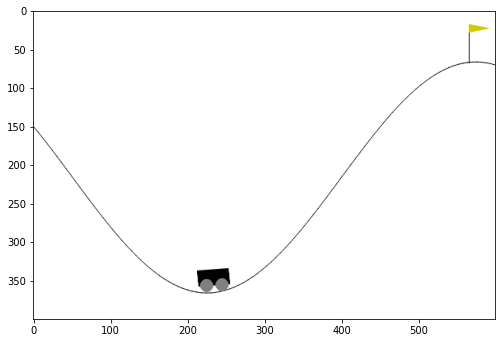

In [ ]:
# Параметры для создания анимации
dpi = 72
interval = 50  # ms

# Создание и отображение анимации
plt.figure(figsize=(img[0].shape[1] / dpi, img[0].shape[0] / dpi), dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(), animate, frames=len(img), interval=interval)
display.display(display.HTML(ani.to_jshtml()))

# Закрытие среды после тестирования

По завершении тестирования мы закрываем среду с помощью env.close().

In [ ]:
# Закрытие среды после тестирования
env.close()